# Dictionaries

This chapter presents a built-in type called a dictionary.
It is one of Python's best features -- and the building block of many efficient and elegant algorithms.

We'll use dictionaries to compute the number of unique words in a book and the number of times each one appears.
And in the exercises, we'll use dictionaries to solve word puzzles.

In [24]:
import sys
from pathlib import Path

current = Path.cwd()
for parent in [current, *current.parents]:
    if (parent / '_config.yml').exists():
        project_root = parent  # ← Add project root, not chapters
        break
else:
    project_root = Path.cwd().parent.parent

sys.path.insert(0, str(project_root))

from shared import thinkpython, diagram, jupyturtle
from shared.download import download

# Register as top-level modules so direct imports work in subsequent cells
sys.modules['thinkpython'] = thinkpython
sys.modules['diagram'] = diagram
sys.modules['jupyturtle'] = jupyturtle


## What Is a Dictionary?

- A **dictionary** is like a list, but more general.
- In a list, the indices have to be integers; in a dictionary they can be (almost) any type.
- A dictionary represents a **mapping** from **keys** to **values**, just like a real dictionary. 
- Each dictionary item consists of a **key** and a **value** separated by a **colon**. 
- Dictionary items are separated by **commas** and enclosed in **curly braces**.

As seen in the example below: 

- A **list** of number words can be accessed using an integer as an **index**. 
- A **dictionary** goes in the other direction, and look up a word to get the corresponding integer; in other words, using the keys to look up the values.

In [25]:
nums_lst = ['zero', 'one', 'two']
print(nums_lst)
print(nums_lst[1])

nums_dic = {'zero': 0, 'one': 1, 'two': 2}
print(nums_dic)
print(nums_dic['one'])

['zero', 'one', 'two']
one
{'zero': 0, 'one': 1, 'two': 2}
1


In mathematical language, a dictionary represents a **mapping** from keys to values, so you can also say that each key "maps to" a value.
In this example, each number word maps to the corresponding integer.

The following figure shows the state diagram for `numbers`.
A dictionary is represented by a box with the word "dict" outside and the items inside.
Each item is represented by a key and an arrow pointing to a value.
The quotation marks indicate that the keys here are strings, not variable names.

In [26]:
from diagram import make_dict, Binding, Value

numbers = {'zero': 0, 'one': 1, 'two': 2}

d1 = make_dict(numbers, dy=-0.3, offsetx=0.37)
binding1 = Binding(Value('numbers'), d1)

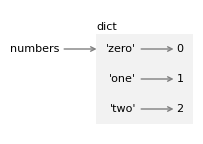

In [69]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [1.83, 1.24, 0.49, 0.85]
ax = diagram(width, height)
bbox = binding1.draw(ax, x, y)
# adjust(x, y, bbox)

## Creating Dictionaries

Python provides several ways to create a dictionary, depending on whether you already have the data or are building it incrementally. T 

1. **dict literal**: the most common approach to create a dictionary
2. `dict()` constructor: to turn sequences into dictionaries
3. dictionary comprehensions: are useful when keys and values come from other sources

Python also has a `dict.fromkeys()` method, which is a special case in creating dictionaries. Overall, common ways ways to create a dictionary include:

| # | Method | Syntax | Notes |
|---|---|---|---|
| 1 | Empty dict literal | `{}` | Fastest way to create an empty dict |
| 2 | Dict literal | `{'a': 1, 'b': 2}` | Keys and values known up front |
| 3 | `dict()` constructor | `dict(a=1, b=2)` | Keys must be valid identifiers |
| 4 | From list of tuples | `dict([('a', 1), ('b', 2)])` | Useful when pairs are already in a sequence |
| 5 | `dict.fromkeys()` | `dict.fromkeys(['a', 'b'], 0)` | All keys share the same default value |
| 6 | Dict comprehension | `{k: v for k, v in items}` | Build from any iterable with an expression |

Pay attention to ways 2, 3, and 4. We usually use dict literal for creating dictionaries but you should know how to use the `dict()` constructor to turn a sequence into a dictionary. Also, try to transfer your skill in list comprehension and tuple comprehension to dictionary comprehension. 

In [ ]:
# 1. Empty dict literal
d1 = {}

# 2. Dict literal with items
d2 = {'zero': 0, 'one': 1, 'two': 2}

# 3. dict() constructor with keyword arguments (keys must be valid identifiers)
d3 = dict(zero=0, one=1, two=2)

# 4. dict() from a list of (key, value) tuples
d4 = dict([('zero', 0), ('one', 1), ('two', 2)])

# 5. dict.fromkeys() — all keys share the same default value
d5 = dict.fromkeys(['zero', 'one', 'two'], 0)

# 6. Dict comprehension
words = ['zero', 'one', 'two']
d6 = {word: idx for idx, word in enumerate(words)} # note the two variables

print("Empty literal:       ", d1)
print("Dict literal:        ", d2)
print("dict() keywords:     ", d3)
print("dict() from tuples:  ", d4)
print("dict.fromkeys():     ", d5)
print("Dict comprehension:  ", d6)

Empty literal:        {}
Dict literal:         {'zero': 0, 'one': 1, 'two': 2}
dict() keywords:      {'zero': 0, 'one': 1, 'two': 2}
dict() from tuples:   {'zero': 0, 'one': 1, 'two': 2}
dict.fromkeys():      {'zero': 0, 'one': 0, 'two': 0}
Dict comprehension:   {'zero': 0, 'one': 1, 'two': 2}


To give some details about dictionary creation, let's use the dictionary literal to create a dictionary, which is to put the items inside curly braces. 

In [ ]:
numbers = {'zero': 0, 'one': 1, 'two': 2}

Each item consists of a **key** and a **value** separated by a **colon**.
The items are separated by commas and enclosed in curly braces.

Another way to create a dictionary is to use the `dict` function.
We can make an empty dictionary like this.

In [ ]:
empty = dict()
empty

{}

Or, if you have a list like [ "zero", "one", "two"], you can use `enumerate()` to create a dictionary.

In [ ]:
lst = ["zero", "one", "two "]

dict_words = {}
for idx, word in enumerate(lst):
    dict_words[word] = idx

print(dict_words)

{'zero': 0, 'one': 1, 'two ': 2}


And we can make a copy of a dictionary like this.

In [76]:
numbers_copy = dict(numbers)
numbers_copy

{'zero': 0, 'one': 1, 'two': 2}

It is often useful to make a copy before performing operations that modify dictionaries.

## Core Operations

### Accessing and Modifying Items

Common ways to access values in a dictionary include:

- d[key] 
- d.get(key)
- d.get(key, default)

We use square brackets `[]` to access and modify items in a Python dictionary by **key**. Dictionaries are **mutable**, so changes happen **in place**, making them convenient for storing and updating structured data.

- Accessing value with key: Reading a value looks like person["name"], which returns the value stored under "name".
  
If a key you a key you try to access is missing, you will receive an error. To avoid the error, use person.get("email"), which returns None or a default value you provide. 




You also use the square brackets to update values. Assigning with person["age"] = 30 will either 
  - updates an existing item, or 
  - creates a new one if the key does not already exist. 


In [90]:
person = {
    "name": "Alice",
    "age": 28,
    "city": "Rolla"
}

# Access an item
print(person["name"])      # Alice

# Modify an existing item
person["age"] = 29

# Add a new item
person["email"] = "alice@rolla.com"

print(person)

Alice
{'name': 'Alice', 'age': 29, 'city': 'Rolla', 'email': 'alice@rolla.com'}


`KeyError` when trying to access a nonexistent key. 

In [87]:
%%expect KeyError

print(person["phone"])      # KeyError

KeyError: 'phone'

Use `dict.get()` to avoid the error by 

- return `None` when the key does not exist
- return a default value you specify when the key does not exist

In [ ]:
print(person.get("phone"))          # None
print(person.get("phone", "N/A"))   # N/A

None
N/SSS


The `len` function works on dictionaries; it returns the number of items.

In [70]:
len(numbers)

3

### Deleting Items

You can delete items from a dictionary when you no longer need a key-value pair. 

- The `del` statement removes an item by its key, such as del person["city"]. 
- Another option is `pop()`, which removes the item and also returns its value, which is useful if you want to use that value later. 

In [108]:
person = {
    "name": "Alice",
    "age": 29,
    "city": "Rolla",
    "email": "alice@rolla.com"
}
print("person:\t\t", person)

# Delete an item using del
del person["city"]

# Delete an item using pop()
removed_email = person.pop("email")

print("person_updated:\t", person)         # {'name': 'Alice', 'age': 29}
print("removed_email:\t", removed_email)  # alice@rolla.com


person:		 {'name': 'Alice', 'age': 29, 'city': 'Rolla', 'email': 'alice@rolla.com'}
person_updated:	 {'name': 'Alice', 'age': 29}
removed_email:	 alice@rolla.com


### Membership Testing

The `in` membership operator works on dictionaries, too; it tells you whether a **key** exists in the dictionary, which returns `True` if the key is present and `False` if it is not. You can also use `not in` to check that a key is missing. 

Member testing is useful when you want to safely decide whether to access, update, or delete a dictionary item.


In [106]:
person = {
    "name": "Alice",
    "age": 29,
    "city": "Rolla"
}

print("name" in person)        # True
print("email" in person)       # False
print("email" not in person)   # True

if "age" in person:             # safety: Check if key exists before accessing
    print("Age exists:", person["age"])

True
False
True
Age exists: 29


The `in` operator does *not* check whether something appears as a value.

In [109]:
"Alice" in person

False

To see whether something appears as a **value** in a dictionary, you can use the method `values`, which returns a sequence of values, and then use the `in` operator.

In [111]:
"Alice" in person.values()

True

### Dictionary Comprehensions

Dictionary comprehensions provide a concise way to build dictionaries from existing data.
The pattern is similar to a list comprehension, but each result contains a key and a value.


In [ ]:
# Dictionary comprehensions
# Basic syntax: {key_expr: value_expr for item in iterable}

# Create a dictionary of squares
square_dict = {x: x**2 for x in range(5)}
print("Square dict:", square_dict)

# From two lists
keys = ['a', 'b', 'c', 'd']
values = [1, 2, 3, 4]
combined_dict = {k: v for k, v in zip(keys, values)}
print("Combined dict:", combined_dict)

# Filter and transform
prices = {'apple': 0.50, 'banana': 0.30, 'orange': 0.80, 'grape': 1.20}
expensive_fruits = {fruit: price for fruit, price in prices.items() if price > 0.50}
print("Expensive fruits:", expensive_fruits)

Square dict: {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
Combined dict: {'a': 1, 'b': 2, 'c': 3, 'd': 4}
Expensive fruits: {'orange': 0.8, 'grape': 1.2}


## Select Topics 

### Why Dictionary Lookup Is Fast

The items in a Python dictionary are stored in a **hash table**, which is a way of organizing data that has a remarkable property: the `in` operator takes about the same amount of time no matter how many items are in the dictionary.
That makes it possible to write some remarkably efficient algorithms.


To demonstrate, we'll compare two algorithms for finding pairs of words where one is the reverse of another -- like `stressed` and `desserts`.
We'll start by reading the word list.

In [43]:
from pathlib import Path
words_file = Path('../../data/words.txt')
if not words_file.exists():
    download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt', words_file)

In [44]:
word_list = words_file.read_text().split()

print(len(word_list))
print(type(word_list))

113783
<class 'list'>


To check out the file content:

In [45]:
for word in word_list[:10]:
    print(word)

aa
aah
aahed
aahing
aahs
aal
aalii
aaliis
aals
aardvark


And here's the `reverse_word` function.

In [46]:
def reverse_word(word):
    return ''.join(reversed(word))

reverse_word('hello')

'olleh'

The following function loops through the words in the list.
For each one, it reverses the letters and then checks whether the reversed word is in the word list.

In [47]:
def too_slow():
    count = 0
    for word in word_list:
        if reverse_word(word) in word_list:
            count += 1
    return count

To measure how long a function takes, we can use `%time` which is one of Jupyter's "built-in magic commands".
These commands are not part of the Python language, so they might not work in other development environments.

```python
%time too_slow()
```
Output:
```python
CPU times: user 1min 9s, sys: 182 ms, total: 1min 9s
Wall time: 1min 9s

885
```

Uncomment the line to run the command in Live Code mode or in your editor.

In [48]:
# %time too_slow()

This function takes more than a minute to run.
The problem is that the `in` operator checks the words in the list one at a time, starting at the beginning.
If it doesn't find what it's looking for -- which happens most of the time -- it has to search all the way to the end.

And the `in` operator is inside the loop, so it runs once for each word.
Since there are more than 100,000 words in the list, and for each one we check more than 100,000 words, the total number of comparisons is the number of words squared -- roughly -- which is almost 13 billion. 

In [49]:
len(word_list)**2

12946571089

We can make this function much faster with a dictionary.
The following loop creates a dictionary that contains the words as keys.

In [50]:
word_dict = {}
for word in word_list:
    word_dict[word] = 1

The values in `word_dict` are all `1`, but they could be anything, because we won't ever look them up -- we will only use this dictionary to check whether a key exists.

Now here's a version of the previous function that replaces `word_list` with `word_dict`.

In [51]:
def much_faster():
    count = 0
    for word in word_dict:
        if reverse_word(word) in word_dict:
            count += 1
    return count

This function takes less than one hundredth of a second, so it's about 10,000 times faster than the previous version.

In general, the time it takes to find an element in a list is proportional to the length of the list.
The time it takes to find a key in a dictionary is almost constant -- regardless of the number of items.

In [52]:
%time much_faster()

CPU times: user 31.9 ms, sys: 1.05 ms, total: 32.9 ms
Wall time: 32.3 ms


885

### Counting with Dictionaries

Suppose you are given a string and you want to count how many times each letter appears.
A dictionary is a good tool for this job.
We'll start with an empty dictionary.


In [53]:
counter = {}

As we loop through the letters in the string, suppose we see the letter `'a'` for the first time.
We can add it to the dictionary like this.

In [54]:
counter['a'] = 1

The value `1` indicates that we have seen the letter once.
Later, if we see the same letter again, we can increment the counter like this.

In [55]:
counter['a'] += 1

Now the value associated with `'a'` is `2`, because we've seen the letter twice.

In [56]:
counter

{'a': 2}

The following function uses these features to count the number of times each letter appears in a string.

In [57]:
def value_counts(string):
    counter = {}
    for letter in string:
        if letter not in counter:
            counter[letter] = 1
        else:
            counter[letter] += 1
    return counter

Each time through the loop, if `letter` is not in the dictionary, we create a new item with key `letter` and value `1`.
If `letter` is already in the dictionary we increment the value associated with `letter`.

Here's an example.

In [58]:
counter = value_counts('brontosaurus')
counter

{'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 2, 'a': 1, 'u': 2}

The items in `counter` show that the letter `'b'` appears once, `'r'` appears twice, and so on.

### Iterating Through Dictionaries

If you use a dictionary in a `for` statement, it traverses the keys of the dictionary.
To demonstrate, let's make a dictionary that counts the letters in `'banana'`.


In [59]:
counter = value_counts('banana')
counter

{'b': 1, 'a': 3, 'n': 2}

The following loop prints the keys, which are the letters.

In [60]:
for key in counter:
    print(key)

b
a
n


To print the values, we can use the `values` method.

In [61]:
for value in counter.values():
    print(value)

1
3
2


To print the keys and values, we can loop through the keys and look up the corresponding values.

In [62]:
for key in counter:
    value = counter[key]
    print(key, value)

b 1
a 3
n 2
